In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# from random import gauss
# from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('./data/kc_house_data.csv')

# Listing out column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Converting column `date` to datetime64[ns] from type string/object
df['date'] = df['date'].astype('datetime64[ns]')

In [5]:
df_copy = df.copy()

In [6]:
df_copy['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [7]:
df_copy = df_copy.sort_values(by=['id', 'date'])
df_copy = df_copy.drop_duplicates(subset=['id'], keep='last')

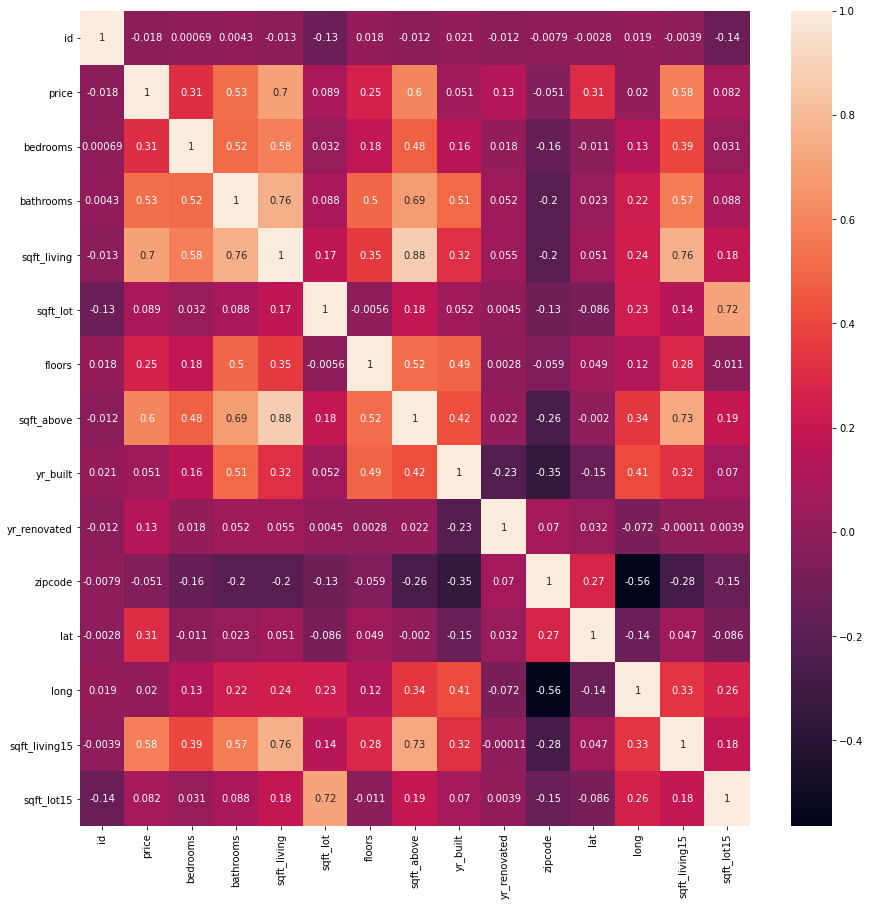

In [8]:
#looking at correlations
fig, ax = plt.subplots(figsize=(15,15))
heat = sns.heatmap(df_copy.corr(), annot = True)

In [9]:
df_copy.groupby('view').mean()

df_copy.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
3910,9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,YES,AVERAGE,Average,11 Excellent,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9245,9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
4407,2470100110,2014-08-04,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13 Mansion,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
1446,8907500070,2015-04-13,5350000.00,5,5.00,8000,23985,2.00,NO,EXCELLENT,Average,12 Luxury,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,7999600180,2014-05-29,83000.00,2,1.00,900,8580,1.00,NO,NONE,Average,5 Fair,900,0.0,1918,0.00,98168,47.47,-122.27,2060,6533
2139,1623049041,2014-05-08,82500.00,2,1.00,520,22334,1.00,NO,NONE,Fair,5 Fair,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570
16184,3028200080,2015-03-24,81000.00,2,1.00,730,9975,1.00,NaN,NONE,Poor,5 Fair,730,0.0,1943,0.00,98168,47.48,-122.31,860,9000
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4 Low,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500


In [10]:
# Dropping irrelevant columns
df_copy.drop(columns = ['id', 'floors', 'waterfront', 'date',
                        'lat', 'long', 'condition', 'yr_renovated',
                         'sqft_lot15','sqft_above', 'sqft_living15',
                         'sqft_basement', 'zipcode', 'yr_built'],
                        inplace=True)

In [11]:
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
2495,300000.00,6,3.00,2400,9373,NONE,7 Average
6729,647500.00,4,1.75,2060,26036,NONE,8 Good
8404,400000.00,3,1.00,1460,43000,NONE,7 Average
8800,235000.00,3,1.00,1430,7599,NONE,6 Low Average
3553,402500.00,4,2.00,1650,3504,NONE,7 Average


In [12]:
df_copy.grade = [x.replace(" ", "_").strip() for x in df_copy.grade]

In [13]:
# Establishing target and predictor variables
df_copy = df_copy[df_copy['grade'] != '3 Poor']

In [14]:
df_copy = df_copy[df_copy['bedrooms'] != 33] #

In [15]:
df_copy.bedrooms = df_copy.bedrooms.astype(str)

In [16]:
df_copy.bathrooms  = df_copy.bathrooms.astype(str)

In [17]:
df_copy = df_copy.dropna(subset = ['view'])

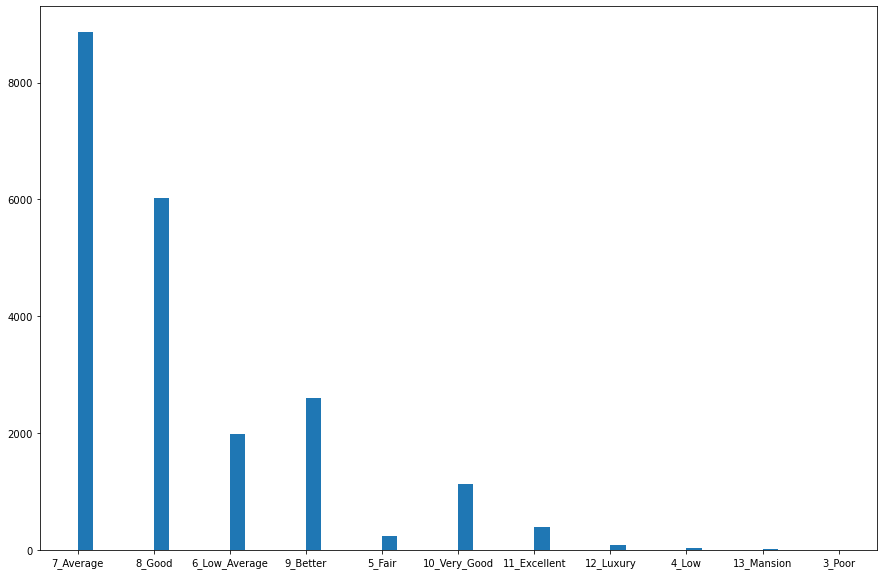

In [18]:
fig, ax = plt.subplots(figsize = (15, 10))

ax.hist(df_copy['grade'], bins = 50);

In [19]:
#fig, ax = plt.subplots(figsize = (15, 10))

#ax.barh(df_copy['grade'], width = df_copy['price']);

In [20]:
df_copy.describe()

,price,sqft_living,sqft_lot
count,21356.00,21356.00,21356.00
mean,541620.55,2082.66,15119.66
std,366247.73,918.16,41499.47
min,78000.00,370.00,520.00
25%,324950.00,1430.00,5040.00
50%,450000.00,1920.00,7613.50
75%,645000.00,2550.00,10696.25
max,7700000.00,13540.00,1651359.00


There is a max of $7.7 mil house 

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


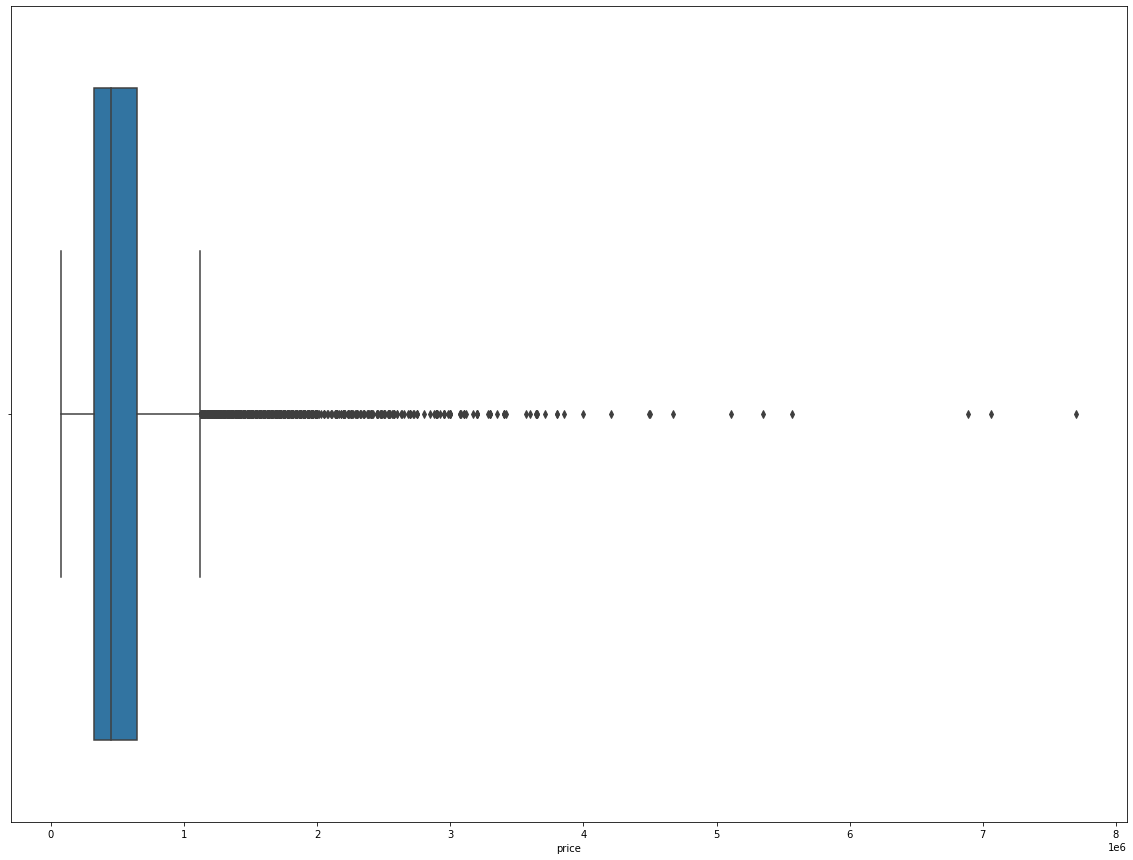

In [21]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.boxplot(df_copy['price']);

In [22]:
#mean IQR 
q3, q1 = np.percentile(df_copy['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit = df_copy['price'].mean()- (iqr*1.5)

upper_limit = df_copy['price'].mean()+ (iqr*1.5)

lower_limit, upper_limit

(61545.54813635512, 1021695.5481363551)

In [23]:
#Finding where our outliers are in terms of how far they are from the IQR
#using median here because mean takes the 
q3, q1 = np.percentile(df_copy['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit2 = df_copy['price'].median()- (iqr*1.5)

upper_limit2 = df_copy['price'].median()+ (iqr*1.5)

lower_limit2, upper_limit2

(-30075.0, 930075.0)

In [24]:
df_copy[(df_copy['price'] >  930075)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
4739,1490000.00,5,3.5,3620,7821,AVERAGE,10_Very_Good
5235,1040000.00,5,2.75,3050,8904,NONE,8_Good
216,1510000.00,5,3.0,3300,33474,GOOD,9_Better
11661,1730000.00,5,3.5,5000,26540,GOOD,10_Very_Good
17966,2030000.00,4,3.75,4100,22798,GOOD,11_Excellent
...,...,...,...,...,...,...,...
19742,2250000.00,3,3.25,3890,3452,NONE,12_Luxury
19651,1450000.00,4,3.5,2860,2199,NONE,10_Very_Good
4807,2480000.00,5,3.75,6810,7500,NONE,13_Mansion
11912,1440000.00,4,3.0,3720,5000,NONE,9_Better


In [25]:
df_copy[(df_copy['price'] >  1021695)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
4739,1490000.00,5,3.5,3620,7821,AVERAGE,10_Very_Good
5235,1040000.00,5,2.75,3050,8904,NONE,8_Good
216,1510000.00,5,3.0,3300,33474,GOOD,9_Better
11661,1730000.00,5,3.5,5000,26540,GOOD,10_Very_Good
17966,2030000.00,4,3.75,4100,22798,GOOD,11_Excellent
...,...,...,...,...,...,...,...
18640,1390000.00,3,1.25,2400,6653,AVERAGE,11_Excellent
19742,2250000.00,3,3.25,3890,3452,NONE,12_Luxury
19651,1450000.00,4,3.5,2860,2199,NONE,10_Very_Good
4807,2480000.00,5,3.75,6810,7500,NONE,13_Mansion


In [26]:
#droppped big outliers base on median price, narrowing down the market
df_copy = df_copy[df_copy['price'] < upper_limit2]

In [27]:
#Finding where our outliers are in sqft_living
q3, q1 = np.percentile(df_copy['sqft_living'], [75, 25])
q3, q1
iqr = q3-q1

living_lower_limit = df_copy['sqft_living'].median()- (iqr*1.5)

living_upper_limit = df_copy['sqft_living'].median()+ (iqr*1.5)

living_lower_limit, living_upper_limit

(330.0, 3330.0)

In [28]:
df_copy = df_copy[df_copy['sqft_living'] < living_upper_limit]

In [29]:
df_copy['price'] = np.log(df_copy['price'])

# SPLIT

In [30]:
X = df_copy.drop(columns = 'price')

In [31]:
y = df_copy.price

In [32]:
# Creating variables for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
# Did it split correctly?
len(X_train + X_test) == len(X)

True

In [34]:
# Baseline model for train split
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X_t = X_train
y_t = y_train

# Fit
dummy_lr.fit(X_t,y_t)

# Score
dummy_lr.score(X_t,y_t)

#predict
dummy_pred1 = dummy_lr.predict(X_t)

#RMSE
print(mean_squared_error(np.exp(y_t), np.exp(dummy_pred1), squared=False))
print(r2_score(y_t, dummy_pred1))

180063.97726253234
0.0


In [35]:
# Baseline model for test split

# Create variables
X_test1 = X_test
y_test1 = y_test

# Score
dummy_lr.score(X_test1,y_test1)

#predict
dummy_pred2 = dummy_lr.predict(X_test1)

#RMSE
print(mean_squared_error(np.exp(y_test1), np.exp(dummy_pred2), squared=False))
print(r2_score(y_test1,dummy_pred2))

181784.7869849533
-0.0007690474216091037


In [36]:
simple_model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()

In [37]:
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     4877.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:01:44   Log-Likelihood:                -4542.4
No. Observations:               12474   AIC:                             9089.
Df Residuals:                   12472   BIC:                             9104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2823      0.010   1263.939      0.000      12.263      12.301
sqft_living     0.0003   4.99e-06     69.837      0.000       0.000       0.000
==============================================================================
Omnibus:                      244.505   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.284
Skew:                          -0.120   Prob(JB):                     2.32e-33
Kurtosis:                       2.518   Cond. No.                     6.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Get our predictions!
simple_train_preds = simple_model.predict(sm.add_constant(X_train['sqft_living']))
simple_train_preds

3144    12.78
13417   12.96
11091   12.99
9745    12.73
1366    13.13
         ... 
3705    13.13
6852    12.90
1133    12.83
14421   12.59
6166    12.60
Length: 12474, dtype: float64

In [39]:
# Can now predict for our test set!
simple_test_preds = simple_model.predict(sm.add_constant(X_test['sqft_living']))
simple_test_preds

5631    13.12
3396    12.74
3044    12.75
12500   12.70
11013   13.18
         ... 
1082    12.97
18236   12.87
8035    13.06
17729   13.25
13130   13.20
Length: 6145, dtype: float64

In [40]:
####THIS IS THE SKLEARN WAY OF GETTING THE R2 COMPARED TO STATSMODEL WHERE IT GIVES US IN THE SUMMARY
r2_score(y_test,simple_test_preds)

0.3042592626656896

In [41]:
r2_score(y_train,simple_train_preds) #SAME AS THE R-SQUARED IN THE SUMMARY ABOVE FOR TRAIN

0.2811178005812016

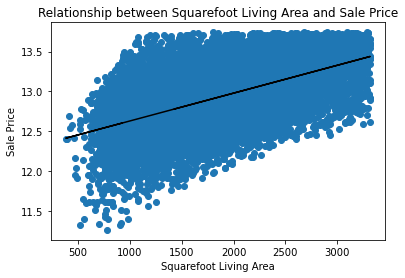

In [42]:
# Just looking at two variables

# Plot our points, rating vs balance, as a scatterplot
plt.scatter(X_train['sqft_living'], y_train)

# Plot the line of best fit!
plt.plot(X_train['sqft_living'], simple_train_preds, color='black')

plt.ylabel('Sale Price')
plt.xlabel('Squarefoot Living Area')
plt.title('Relationship between Squarefoot Living Area and Sale Price')
plt.show()

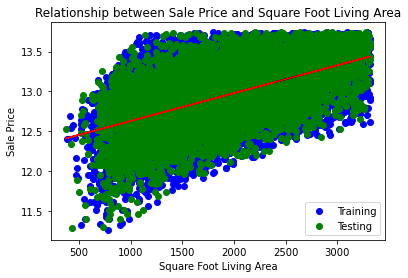

In [43]:
#THIS IS TESTING 
# One last thing - can visualize both train and test set!

# Plot our training data
plt.scatter(X_train['sqft_living'], y_train, color='blue', label='Training')
# Plot our testing data
plt.scatter(X_test['sqft_living'], y_test, color='green', label='Testing')


# Plot the line of best fit
plt.plot(X_train['sqft_living'], simple_train_preds, color='black')
# Plotting for the test data just to show it's the same!
plt.plot(X_test['sqft_living'], simple_test_preds, color='red')

plt.ylabel('Sale Price')
plt.xlabel('Square Foot Living Area')
plt.title('Relationship between Sale Price and Square Foot Living Area')
plt.legend()
plt.show()

# Statistical Analysis on Train_DF

In [44]:
summary_of_view = df_copy.groupby('view').agg(['mean', 'std'])

summary_of_view

price      sqft_living        sqft_lot          
           mean  std        mean    std     mean       std
view                                                      
AVERAGE   13.18 0.35     2081.44 634.67 20893.51  54804.27
EXCELLENT 13.36 0.30     2105.09 647.35 20259.54  30854.82
FAIR      13.21 0.34     2087.95 641.49 12078.11  20053.50
GOOD      13.23 0.33     2244.06 576.37 41259.38 129422.14
NONE      12.91 0.41     1828.14 620.97 12560.52  31509.39

In [45]:
#Created for analysis only
#should not be used anywhere else in the project besised t-tests
train_df = pd.concat([X_train, y_train], axis=1)

In [46]:
# Figure out how to do this in a loop/function?
df_average = train_df[train_df['view'] == 'AVERAGE']
df_excellent = train_df[train_df['view'] == 'EXCELLENT']
df_fair = train_df[train_df['view'] == 'FAIR']
df_good = train_df[train_df['view'] == 'GOOD']
df_none = train_df[train_df['view'] == 'NONE']

In [47]:
X_train['view'].value_counts()

NONE         11651
AVERAGE        428
GOOD           178
FAIR           155
EXCELLENT       62
Name: view, dtype: int64

In [48]:
fvalue, pvalue = stats.f_oneway(df_average['price'], df_excellent['price'], df_fair['price'],
                                df_good['price'] , df_none['price'])

In [49]:
df_view = train_df[['view', 'price']]

print(pairwise_tukeyhsd(df_view['price'], df_view['view']))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
  AVERAGE EXCELLENT   0.1439  0.067  -0.006  0.2937  False
  AVERAGE      FAIR   0.0329    0.9 -0.0705  0.1363  False
  AVERAGE      GOOD   0.0423 0.7403 -0.0561  0.1406  False
  AVERAGE      NONE  -0.2665  0.001 -0.3208 -0.2123   True
EXCELLENT      FAIR   -0.111 0.3587 -0.2767  0.0548  False
EXCELLENT      GOOD  -0.1016 0.4326 -0.2643   0.061  False
EXCELLENT      NONE  -0.4104  0.001 -0.5509   -0.27   True
     FAIR      GOOD   0.0093    0.9 -0.1118  0.1305  False
     FAIR      NONE  -0.2995  0.001 -0.3886 -0.2103   True
     GOOD      NONE  -0.3088  0.001 -0.3921 -0.2255   True
----------------------------------------------------------


In [50]:
train_df.grade.value_counts()

7_Average        5866
8_Good           3717
6_Low_Average    1331
9_Better         1153
10_Very_Good      210
5_Fair            167
11_Excellent       16
4_Low              14
Name: grade, dtype: int64

In [51]:
# Might need a for loop or a function here
df_10 = train_df[train_df['grade'] == '10_Very_Good']
df_11 = train_df[train_df['grade'] == '11_Excellent']
df_4 = train_df[train_df['grade'] == '4_Low']
df_5 = train_df[train_df['grade'] == '5_Fair']
df_6 = train_df[train_df['grade'] == '6_Low_Average']
df_7 = train_df[train_df['grade'] == '7_Average']
df_8 = train_df[train_df['grade'] == '8_Good']
df_9 = train_df[train_df['grade'] == '9_Better']

In [52]:
# Finding f-statistic and p-value using ANOVA testing

f_value_grade, p_value_grade = stats.f_oneway(df_10['price'], df_11['price'],
                                              df_4['price'], df_5['price'], df_6['price'],
                                              df_7['price'], df_8['price'], df_9['price'])
p_value_grade

0.0

## Ad-hoc/Tukey test for price vs. grade

In [53]:
# Ad-hoc test to determine differeces in price vs. grade

df_grade = train_df[['grade', 'price']]

print(pairwise_tukeyhsd(train_df['price'], train_df['grade']))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
 10_Very_Good  11_Excellent   0.1282 0.8109 -0.1393  0.3958  False
 10_Very_Good         4_Low  -1.3416  0.001 -1.6264 -1.0568   True
 10_Very_Good        5_Fair  -1.1376  0.001 -1.2446 -1.0307   True
 10_Very_Good 6_Low_Average  -0.9561  0.001 -1.0327 -0.8795   True
 10_Very_Good     7_Average  -0.6674  0.001 -0.7399  -0.595   True
 10_Very_Good        8_Good  -0.4152  0.001 -0.4884 -0.3421   True
 10_Very_Good      9_Better  -0.1755  0.001 -0.2529 -0.0981   True
 11_Excellent         4_Low  -1.4698  0.001 -1.8474 -1.0923   True
 11_Excellent        5_Fair  -1.2658  0.001 -1.5358 -0.9959   True
 11_Excellent 6_Low_Average  -1.0843  0.001 -1.3438 -0.8249   True
 11_Excellent     7_Average  -0.7956  0.001 -1.0539 -0.5374   True
 11_Excellent        8_Good  -0.5435  0.001 -0.8019  -0.285   

Dropping the view_Fair because it's not different in term of mean price compared to average, dropping low in grade because it's not significant to some other grades but significant to others.

In [54]:
print(pairwise_tukeyhsd(train_df['price'], train_df['view']))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
  AVERAGE EXCELLENT   0.1439  0.067  -0.006  0.2937  False
  AVERAGE      FAIR   0.0329    0.9 -0.0705  0.1363  False
  AVERAGE      GOOD   0.0423 0.7403 -0.0561  0.1406  False
  AVERAGE      NONE  -0.2665  0.001 -0.3208 -0.2123   True
EXCELLENT      FAIR   -0.111 0.3587 -0.2767  0.0548  False
EXCELLENT      GOOD  -0.1016 0.4326 -0.2643   0.061  False
EXCELLENT      NONE  -0.4104  0.001 -0.5509   -0.27   True
     FAIR      GOOD   0.0093    0.9 -0.1118  0.1305  False
     FAIR      NONE  -0.2995  0.001 -0.3886 -0.2103   True
     GOOD      NONE  -0.3088  0.001 -0.3921 -0.2255   True
----------------------------------------------------------


# OHE AND SCALING TRAIN AND TEST

In [55]:
scaler = StandardScaler()

# Calling to certain columns
continous = [c for c in X_train.columns if (X_train[c].dtype == 'int64')| (X_train[c].dtype == 'float64')]

ct = ColumnTransformer(transformers=[('scale', scaler, continous)],
                       remainder='drop')
ct.fit(X_train)

# Transform training data
X_train_scaled = X_train.copy()
X_train_trans = ct.transform(X_train)

X_train_scaled[continous] = X_train_trans

# Scaling testing data

X_test_scaled = X_test.copy()

X_test_trans = ct.transform(X_test)
X_test_scaled[continous] = X_test_trans

In [56]:
#scaled_df = pd.DataFrame(X_train_scaled, c, index = X_train.index)
#X_test_scale = pd.DataFrame(X_test_scaled, columns = ct.get_feature_names_out(), index = X_test.index)

In [57]:
#scaled_df.info()

In [58]:
#X_test_scale.info()

In [59]:

#scaled_df

In [60]:
#scaled_df.columns = [x.replace('scale__', "").replace('remainder__','').strip() for x in scaled_df.columns]
#X_test_scale.columns = [x.replace('scale__', "").replace('remainder__','').strip() for x in scaled_df.columns]

In [61]:
#scaled_df.info()

In [62]:
#def method_type(df, cols, types):
#    df[cols] = df[cols].astype(types)
#    return df

In [63]:
#method_type(X_test_scale,'sqft_living',float)

In [64]:
# Need to figure out how to pass a list into cols

In [65]:
#X_test_scale.info()

In [66]:
#def converter(df, cols, types):
#    for cols in cols:
#        df[cols]=df[cols].astype(types)    
#    return df

In [67]:
#for x in X_test_scale:
#    print(x)

In [68]:
#column_names = ['sqft_living', 'sqft_lot']

In [69]:
#test_var1 = X_test_scale['sqft_living'].value_counts()

In [70]:
#test_var2 = X_test_scale['sqft_lot'].value_counts()

In [71]:
#(test_var1)

In [72]:
#converter(X_test_scale, column_names, float)

In [73]:
#X_test_scale.info()

In [74]:
#Convert to a function or loop
#X_test_scale.sqft_living = X_test_scale.sqft_living.astype(float)
#X_test_scale.sqft_lot = X_test_scale.sqft_lot.astype(float)
#X_test_scale.price = X_test_scale.price.astype(float)

#scaled_df.sqft_living = scaled_df.sqft_living.astype(float)
#scaled_df.sqft_lot = scaled_df.sqft_lot.astype(float)
#scaled_df.price = scaled_df.price.astype(float)

In [75]:
#scaled_df.info()

In [76]:
cat_cols = [c for c in X_train_scaled.columns if X_train_scaled[c].dtype == 'O']

encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct2 = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct2.fit(X_train_scaled)
X_train_enc = ct2.transform(X_train_scaled)
X_train_enc

#OHE testing
X_test_enc = ct2.transform(X_test_scaled)
X_test_enc

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<6145x44 sparse matrix of type '<class 'numpy.float64'>'
	with 36869 stored elements in Compressed Sparse Row format>

In [77]:
scaled_p_df = pd.DataFrame(X_train_enc.todense() ,columns= ct2.get_feature_names_out(), index = y_train.index)
scaled_test_df= pd.DataFrame(X_test_enc.todense(), columns= ct2.get_feature_names_out(), index = y_test.index)

In [78]:
scaled_p_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12474 entries, 3144 to 6166
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ohe__bedrooms_1           12474 non-null  float64
 1   ohe__bedrooms_10          12474 non-null  float64
 2   ohe__bedrooms_11          12474 non-null  float64
 3   ohe__bedrooms_2           12474 non-null  float64
 4   ohe__bedrooms_3           12474 non-null  float64
 5   ohe__bedrooms_4           12474 non-null  float64
 6   ohe__bedrooms_5           12474 non-null  float64
 7   ohe__bedrooms_6           12474 non-null  float64
 8   ohe__bedrooms_7           12474 non-null  float64
 9   ohe__bedrooms_8           12474 non-null  float64
 10  ohe__bathrooms_0.5        12474 non-null  float64
 11  ohe__bathrooms_0.75       12474 non-null  float64
 12  ohe__bathrooms_1.0        12474 non-null  float64
 13  ohe__bathrooms_1.25       12474 non-null  float64
 14  ohe_

In [79]:
scaled_p_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_p_df.columns]
scaled_test_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_test_df.columns]

In [80]:
scaled_p_df.head()

,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_5.0,bathrooms_5.25,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,grade_10_Very_Good,grade_11_Excellent,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,sqft_living,sqft_lot
3144,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.66,-0.26
13417,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.15,-0.14
11091,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.31,-0.23
9745,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.90,-0.11
1366,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.95,-0.09


In [81]:
scaled_p_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)
scaled_test_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

# No clue but it's only on training data/ Assumption testing?

In [82]:
scaled_p_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12474 entries, 3144 to 6166
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms_1           12474 non-null  float64
 1   bedrooms_10          12474 non-null  float64
 2   bedrooms_11          12474 non-null  float64
 3   bedrooms_2           12474 non-null  float64
 4   bedrooms_3           12474 non-null  float64
 5   bedrooms_4           12474 non-null  float64
 6   bedrooms_5           12474 non-null  float64
 7   bedrooms_6           12474 non-null  float64
 8   bedrooms_7           12474 non-null  float64
 9   bedrooms_8           12474 non-null  float64
 10  bathrooms_0.5        12474 non-null  float64
 11  bathrooms_0.75       12474 non-null  float64
 12  bathrooms_1.0        12474 non-null  float64
 13  bathrooms_1.25       12474 non-null  float64
 14  bathrooms_1.5        12474 non-null  float64
 15  bathrooms_1.75       12474 non-nul

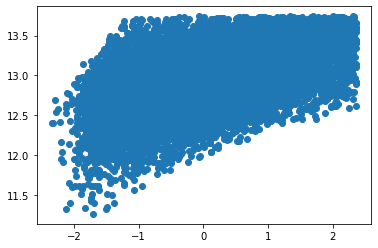

In [83]:
fig, ax = plt.subplots()

x = scaled_p_df['sqft_living']
y = y_train


ax.scatter(x, y);

In [84]:
np.corrcoef(df['sqft_living'],df['price'])

array([[1.       , 0.7019173],
       [0.7019173, 1.       ]])

In [85]:
#Define X and y variable using scaled & parse dataframe

X_s_p = scaled_p_df[['sqft_living']]
y_s_p = y_train

In [86]:
# Baseline model
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X = scaled_p_df['sqft_living']
y = y_train

# Fit
dummy_lr.fit(X,y)

# Score
dummy_lr.score(X,y)

#predict
dummy_pred = dummy_lr.predict(X)

#RMSE
mean_squared_error(np.exp(y), np.exp(dummy_pred), squared=False)

180063.97726253234

In [87]:
#Sk learn version
sk_lr = LinearRegression()
sk_lr.fit(X_s_p, y_s_p)
preds = sk_lr.predict(X_s_p)

mean_squared_error(np.exp(y_s_p), np.exp(preds))

23174434821.724888

In [88]:
X = scaled_p_df['sqft_living']
y = y_train

In [89]:
X = scaled_p_df['sqft_living']
y = y_train
resids = y - preds
resids

3144    -0.03
13417    0.06
11091   -0.42
9745     0.18
1366     0.29
         ... 
3705     0.05
6852    -0.39
1133    -0.20
14421    0.49
6166     0.78
Name: price, Length: 12474, dtype: float64

In [90]:
#Create out bins

bins = int( len(X)**.5)
bins

111

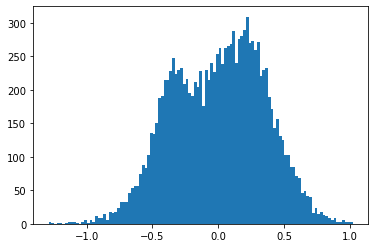

In [91]:
#Histogram of residuals

plt.hist(resids, bins=bins);

In [92]:
print(resids.max())
resids.min()

1.0232280952972168


-1.289688660770592

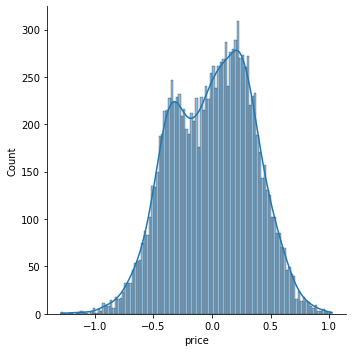

In [93]:
sns.displot(resids, bins=bins, kde=True)

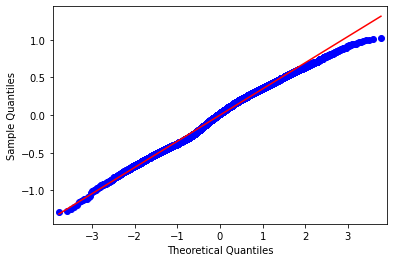

In [94]:
sm.qqplot(resids, line='r');

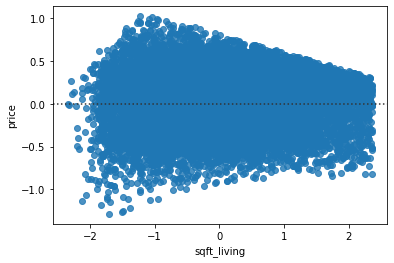

In [95]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

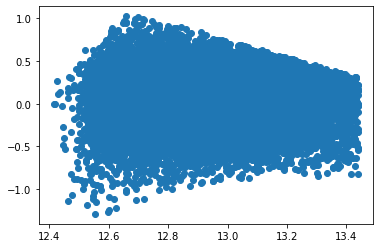

In [96]:
plt.scatter(preds, resids);

# Train df Modeling

In [97]:
## Example function to fit, score model, and return score model & r2_score

def scores(x,y):
    regressor = LinearRegression()
    regressor.fit(x,y)
    y_pred = regressor.predict(x)
    result1 = regressor.score(x,y)
    result2 = r2_score(y,y_pred)
    rmse = mean_squared_error(np.exp(y), np.exp(y_pred), squared=False)
    
    print("Model train score is:", result1) 
    print("Train r2_score is:", result2)
    print("The train RMSE is:" , rmse)

In [98]:
# Creating a straightforward, initial model --
# just for kicks
#simple_formula = 'price ~ sqft_living'
#simple_models = ols(formula = simple_formula,
#                   data = scaled_p_df).fit()
#simple_mod_summ = simple_models.summary()

#simple_mod_summ

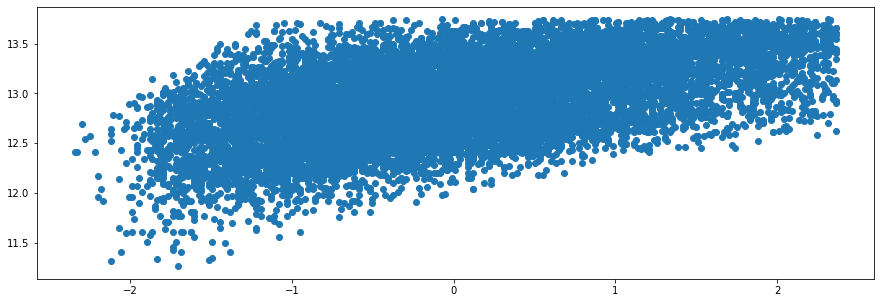

In [99]:
fig, ax = plt.subplots(figsize=(15,5))

x1 = scaled_p_df[['sqft_living']]
y1 = y_train

#x2 = scaled_and_parse_df[['bedrooms']]


ax.scatter(x1, y1)
# ax[1].scatter(x2,y1);

#plt.savefig('sqft_living&price.png')


In [100]:
#simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE'          

#simple_model4 = ols(formula = simple_formula4,
#                   data = scaled_p_df).fit()

#simple_mod_summ4 = simple_model4.summary()

#simple_mod_summ4

In [132]:
no_y_train_df = scaled_p_df.copy()

In [133]:
#all_var = sm.OLS(y_train, sm.add_constant(X_train)).fit()
#all_var.summary()

In [134]:
no_bathrooms = no_y_train_df[no_y_train_df.columns.drop(list(no_y_train_df.filter(regex='bathrooms')))]

In [135]:
#all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms)).fit()
#all_var.summary()

In [136]:
scores(no_bathrooms, y_train)

Model train score is: 0.3834005376710904
Train r2_score is: 0.3834005376710904
The train RMSE is: 140993.48630303508


In [106]:
no_bathrooms_bedrooms = no_bathrooms[no_bathrooms.columns.drop(\
                                    list(no_bathrooms.filter(regex= 'bedrooms')))]

In [107]:
#all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms_bedrooms)).fit()
#all_var.summary()

In [108]:
scores(no_bathrooms_bedrooms, y_train)

Model train score is: 0.3773158781509588
Train r2_score is: 0.3773158781509588
The train RMSE is: 141538.06819203508


In [109]:
no_bathrooms_bedrooms_lot = no_bathrooms_bedrooms.drop(columns = 'sqft_lot')

In [110]:
#all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms_bedrooms_lot)).fit()
#all_var.summary()

In [111]:
scores(no_bathrooms_bedrooms_lot, y_train)

Model train score is: 0.37731214784836553
Train r2_score is: 0.37731214784836553
The train RMSE is: 141542.72895077147


## Testing Best model on test dataset 

Our simple model appears to under perform our test model by .02.

In [112]:
def test_scores(x_test,y_test):
    
    model = LinearRegression()
    model.fit(no_bathrooms_bedrooms_lot, y_train)
    
    test_preds = model.predict(x_test)
    
    result1 = model.score(x_test,y_test)
    result2 = r2_score(y_test,test_preds)
    rmse = mean_squared_error(np.exp(y_test), np.exp(test_preds), squared=False)
    
    print("Model test score is:", result1) 
    print("Test r2_score is:", result2)
    print("The test data RMSE is:" , rmse)

In [113]:
#getting the test data to the correct amount of columns through these steps, since our best model was 
#created from a train df that had less columns compared to what we initially started with
test_no_bedroom = scaled_test_df[scaled_test_df.columns.drop(\
                                    list(scaled_test_df.filter(regex= 'bedrooms')))]

In [114]:
test_no_bed_bath = test_no_bedroom[test_no_bedroom.columns.drop(\
                                    list(test_no_bedroom.filter(regex= 'bathrooms')))]

In [115]:
test_no_bed_bath_lot = test_no_bed_bath.drop(columns = ['sqft_lot'])

In [116]:
scores(no_bathrooms_bedrooms_lot, y_train)

Model train score is: 0.37731214784836553
Train r2_score is: 0.37731214784836553
The train RMSE is: 141542.72895077147


In [117]:
test_scores(test_no_bed_bath_lot, y_test)

Model test score is: 0.3887991238853038
Test r2_score is: 0.3887991238853038
The test data RMSE is: 140873.7898816605


Our model explained the test variance better than our train by about 3%.

# Graphs for our Presentation

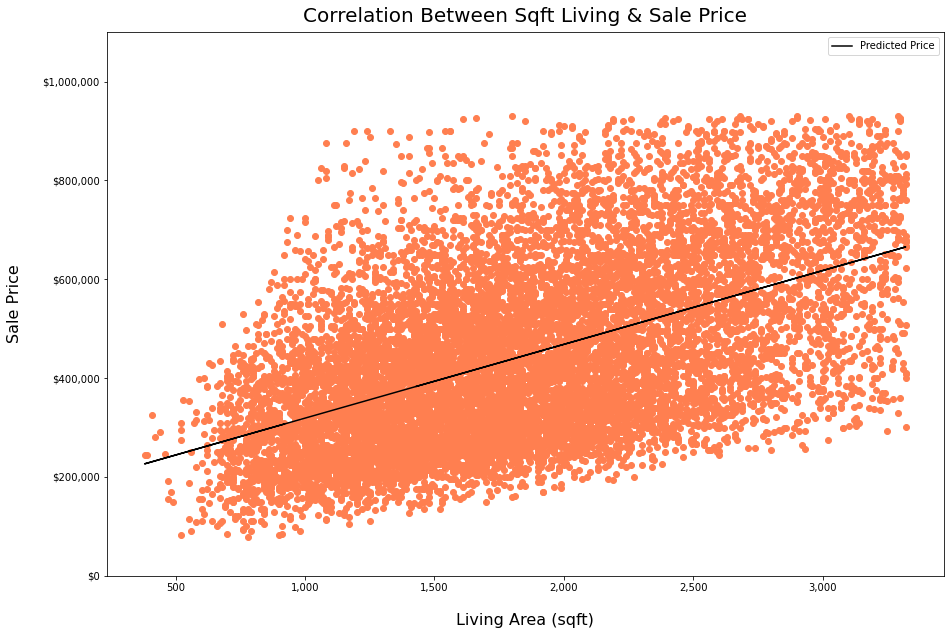

In [118]:
fig, ax = plt.subplots(figsize=(15,10))

x = X_train['sqft_living']
y = np.exp(y_train) 


m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c="black")


ax.set_ylim([0,1100000])

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));

ax.set_title('Correlation Between Sqft Living & Sale Price', fontsize='20', pad=10)
ax.set_xlabel('Living Area (sqft)', fontsize='16', labelpad=20)
ax.set_ylabel('Sale Price', fontsize='16', labelpad=20)

plt.legend(['Predicted Price'])

ax.scatter(x, y, color='coral');
plt.savefig('./images/sqftliving.png')

In [119]:
train_copy = train_df.copy()

In [120]:
train_copy.price = np.exp(train_copy.price)

In [121]:
grade_graph = train_copy.groupby('grade').mean()

In [122]:
grade_graph.sort_values('price', ascending= True, inplace = True)

In [123]:
grade_graph.price.sort_values

<bound method Series.sort_values of grade
4_Low           207785.71
5_Fair          256270.07
6_Low_Average   298794.35
7_Average       398177.78
8_Good          504998.97
9_Better        631769.81
10_Very_Good    738425.30
11_Excellent    828912.50
Name: price, dtype: float64>

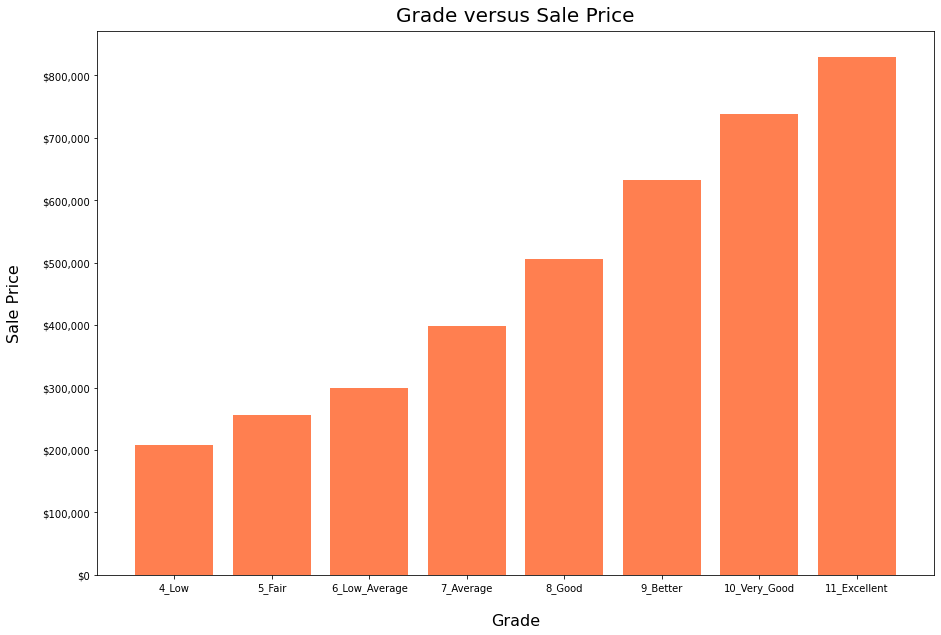

In [124]:
fig, ax = plt.subplots(figsize = (15, 10))

#grade_ticks = ["Low", "Fair", "Low-Average", "Average", "Good", "Better", "Very Good", "Excellent", "Luxury"]
#price_ticks = ["$0", "$200,000", "$400,000", "$600,000", "$800,000"]


x = grade_graph.index
y = grade_graph['price'] 

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))



ax.set_title('Grade versus Sale Price', fontsize='20', pad=10)
#ax.set_xticklabels(grade_ticks, fontsize='13')
#ax.set_yticklabels(price_ticks, fontsize='13')
ax.set_xlabel('Grade', fontsize='16', labelpad=20)
ax.set_ylabel('Sale Price', fontsize='16', labelpad=20)




ax.bar(x, y, color='coral')

plt.savefig('./images/grade.png')

In [125]:
train_copy

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,price
3144,3,2.0,1430,4200,NONE,7_Average,345000.00
13417,3,2.25,1940,8312,FAIR,7_Average,450000.00
11091,4,3.0,2040,5050,NONE,8_Good,289950.00
9745,3,1.5,1280,9600,NONE,7_Average,405000.00
1366,4,2.5,2440,10049,NONE,9_Better,672000.00
...,...,...,...,...,...,...,...
3705,4,1.75,2420,7672,NONE,8_Good,525000.00
6852,3,2.5,1770,8640,NONE,7_Average,270000.00
1133,3,2.5,1560,4100,NONE,7_Average,303000.00
14421,2,1.0,870,7975,AVERAGE,7_Average,475000.00


In [126]:
view_graph = train_copy.groupby('view').mean()

In [127]:
view_graph.sort_values('price', ascending= True, inplace = True)

In [128]:
view_graph

,sqft_living,sqft_lot,price
view,,,
NONE,1825.64,12794.21,436347.45
AVERAGE,2063.22,22008.82,556797.98
FAIR,2144.53,10035.57,572655.92
GOOD,2201.75,36179.81,577080.28
EXCELLENT,2097.52,22564.97,633553.03


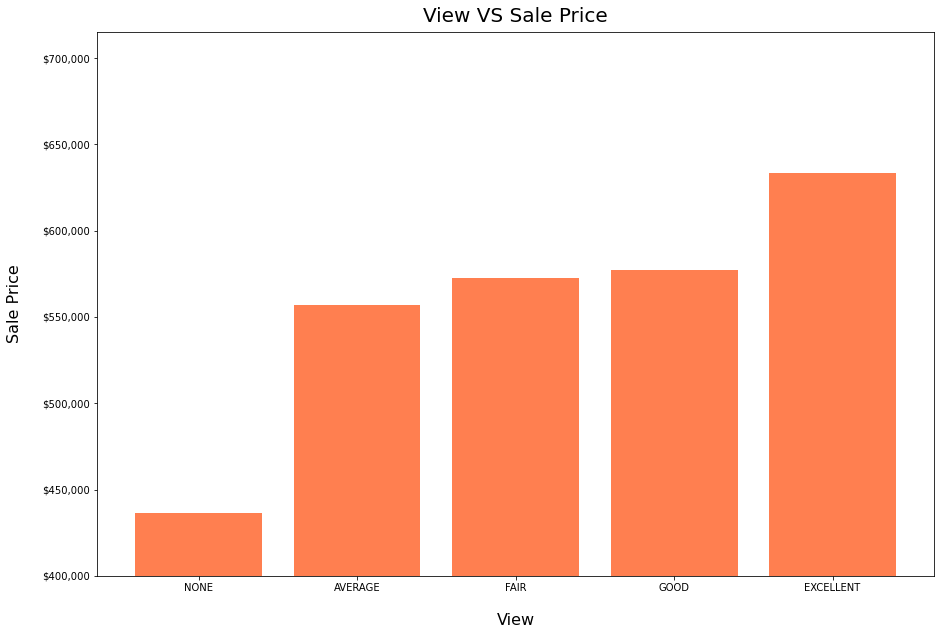

In [129]:
fig, ax = plt.subplots(figsize = (15, 10))

x = view_graph.index
y = view_graph['price'] 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

ax.set_title('View VS Sale Price', fontsize='20', pad=10)
ax.set_xlabel('View', fontsize='16', labelpad=20)
ax.set_ylabel('Sale Price', fontsize='16', labelpad=20)
ax.set_ylim([400000, 715000])


ax.bar(x, y, color='coral')

plt.savefig('./images/view.png')